# Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000) (K)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population (%)
- Rape numeric Rape arrests (per 100,000) (K)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe()
# Bu data özelinde feature'ların min-max değerleri arasında çok fark var. scaling yapılmalı.

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


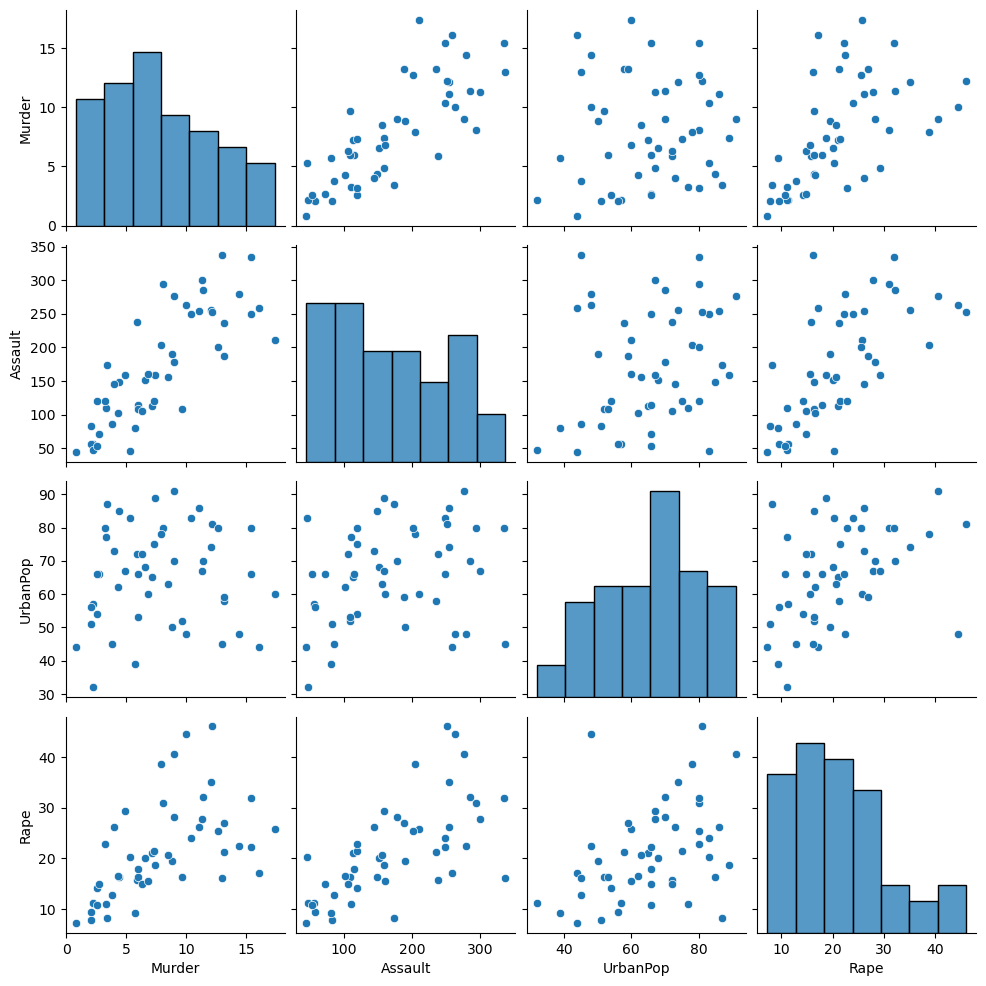

In [7]:
sns.pairplot(df);
# Pairplota baktığımızda bazı feature'lar ile datayı 2 cluster'a ayırabileceğimizi görüyoruz. Assault ve Murder.

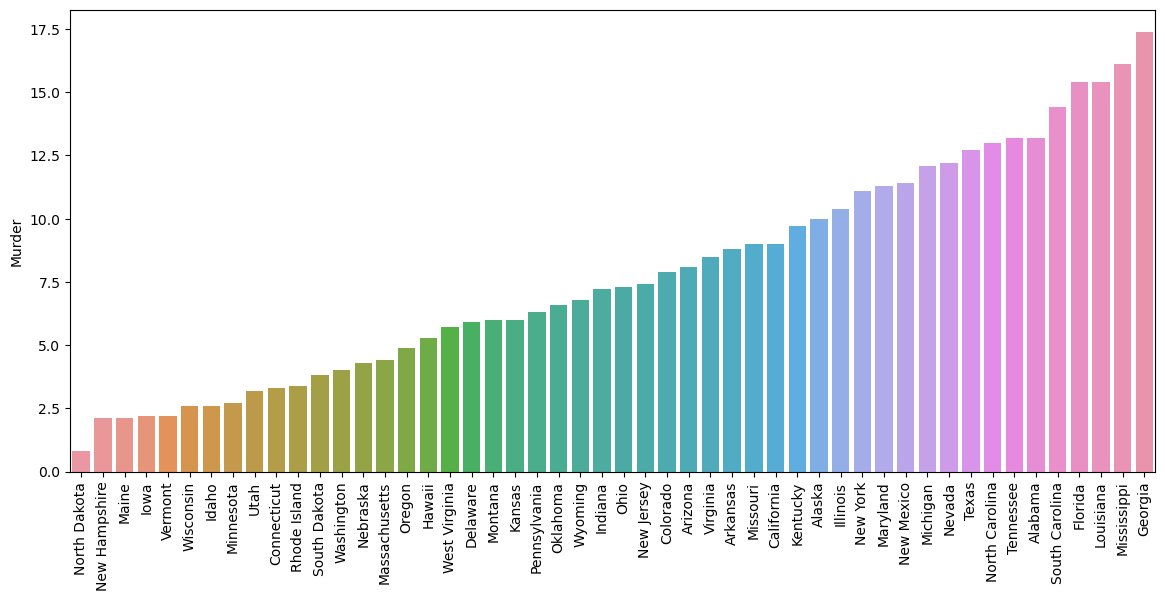

In [17]:
murder = df["Murder"].sort_values()

plt.figure(figsize=(14,6))
sns.barplot(y = murder, x=murder.index)
plt.xticks(rotation=90);

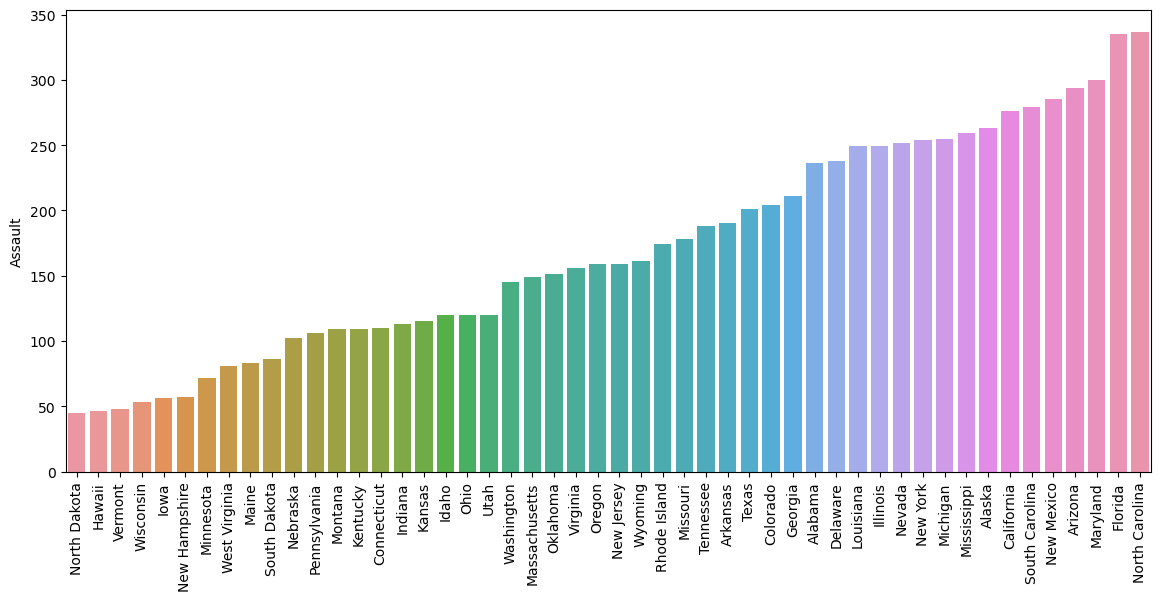

In [15]:
assault = df.Assault.sort_values()

plt.figure(figsize = (14,6))
sns.barplot(y = assault, x = assault.index)
plt.xticks(rotation = 90);

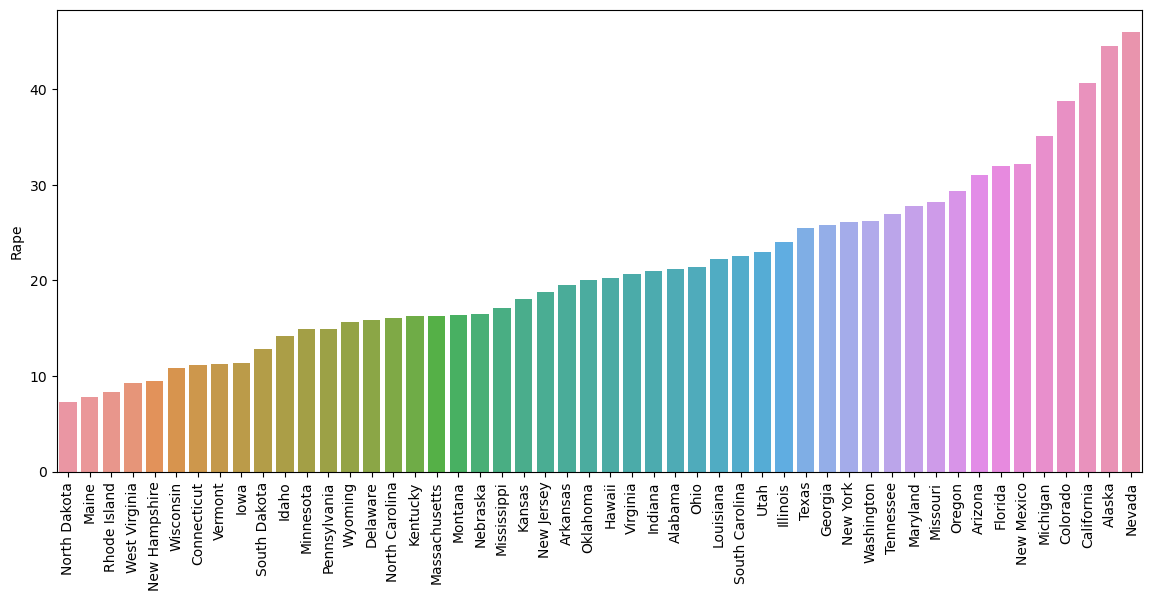

In [16]:
rape = df.Rape.sort_values()

plt.figure(figsize = (14,6))
sns.barplot(y = rape, x = rape.index)
plt.xticks(rotation = 90);

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [18]:
from pyclustertend import hopkins

In [54]:
hopkins(df, df.shape[0])
# 0- 0.5 arası değerler datamızın random dağıldığını ve clustering için uygun oldupunu gösterir.

0.4308896463203476

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
df_minmax = df.copy()
df_standart = df.copy()

In [185]:
hopkins(MinMaxScaler().fit_transform(df_minmax), df_minmax.shape[0])

0.38682549730098265

In [189]:
hopkins(StandardScaler().fit_transform(df_standart), df_standart.shape[0])

0.37868586648192193

In [190]:
# Burada hopkins score'ları karşılaştırarak hangi scale metodunu kullanacağıma karar veriyorum.
# Ancak ikisi de birbirine çok yakın çıktı ve her çalıştırmada hopkins score farklı çıkıyor.
# Datasetinde binary değer olmadığı için standartscaler ile devam etmeye karar verdim.

In [191]:
scaler = StandardScaler()

In [192]:
df_scaled = scaler.fit_transform(df)

In [197]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()
# Burada scaling sonrasi array haline dönüşen datafram'i tekrar dataframe haline çevirdim.

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [198]:
from scipy.cluster.hierarchy import dendrogram, linkage

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [199]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

In [203]:
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]

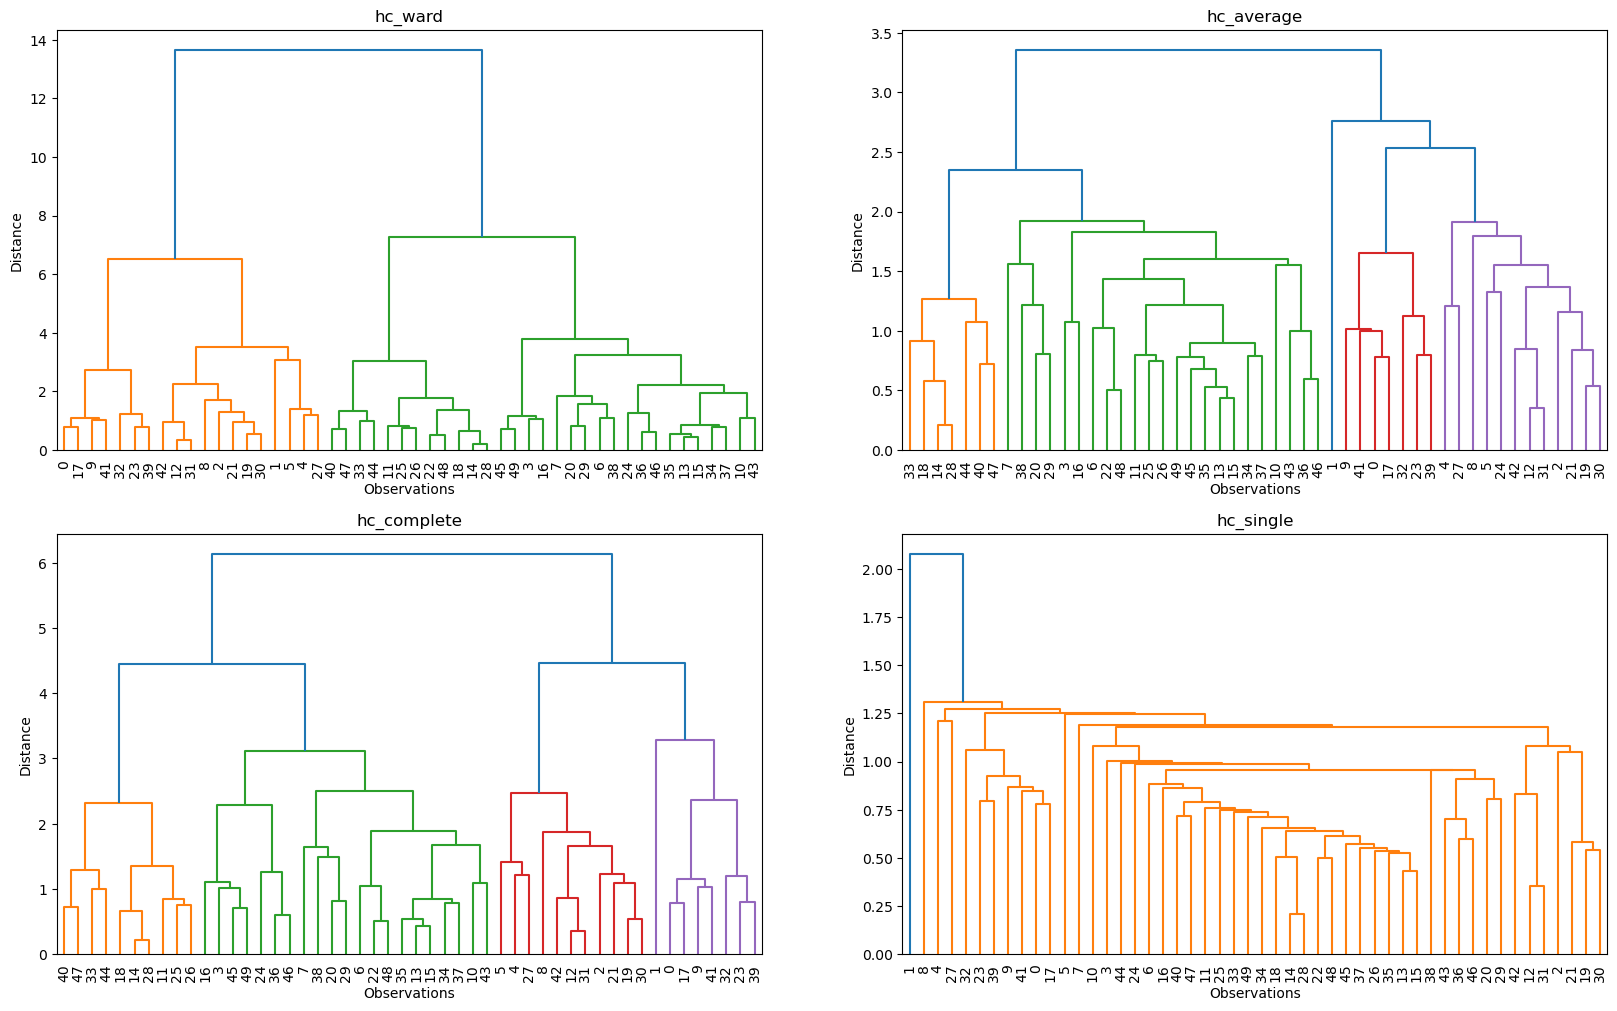

In [204]:
plt.figure(figsize = (20,12))
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10)
    k +=1

In [205]:
# Burada distance'ları karşılaştırınca en büyük değerin "ward"  seçince olduğunu gördük. "Ward" ile devam edecez.

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [206]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [207]:
from sklearn.metrics import silhouette_score

In [210]:
K = range(2, 10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f"k : {k}, silhoutte score : {silhouette_score(df, model.labels_)}")

k : 2, silhoutte score : 0.5521326806156232
k : 3, silhoutte score : 0.37577145261338957
k : 4, silhoutte score : 0.2206978637793439
k : 5, silhoutte score : 0.10736643604371217
k : 6, silhoutte score : 0.05715258849949512
k : 7, silhoutte score : 0.045067264454210616
k : 8, silhoutte score : 0.0019579532635374754
k : 9, silhoutte score : -0.09369748572007279


In [212]:
# Burada silhoutte bize cluster sayısı 2 öneriyor.
# Ancak müşterinin bizden suç oranlarını üç kümeye ayırmamızı istediğini varsayalım. (Az suç, Normal, Çok suç.)

In [214]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# Burada linkage="ward" çünkü den büyük distance farkı ondaydı. "ward" ile de "euclidean" kullanmalıyız.
clusters = model.fit_predict(X)
clusters

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [215]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [219]:
X.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [220]:
# Burada bu 4 feature'un 2li combinasyonlarını plotlayıp en uygun 2 feature'u anlamaya çalışacğm.
# 4'ün 2li combinasyonu demek (4* 3!) / 2 demek. yani 12 adet plot yapacağız.

In [226]:
for i in X.columns:
    print(i)

Murder
Assault
UrbanPop
Rape


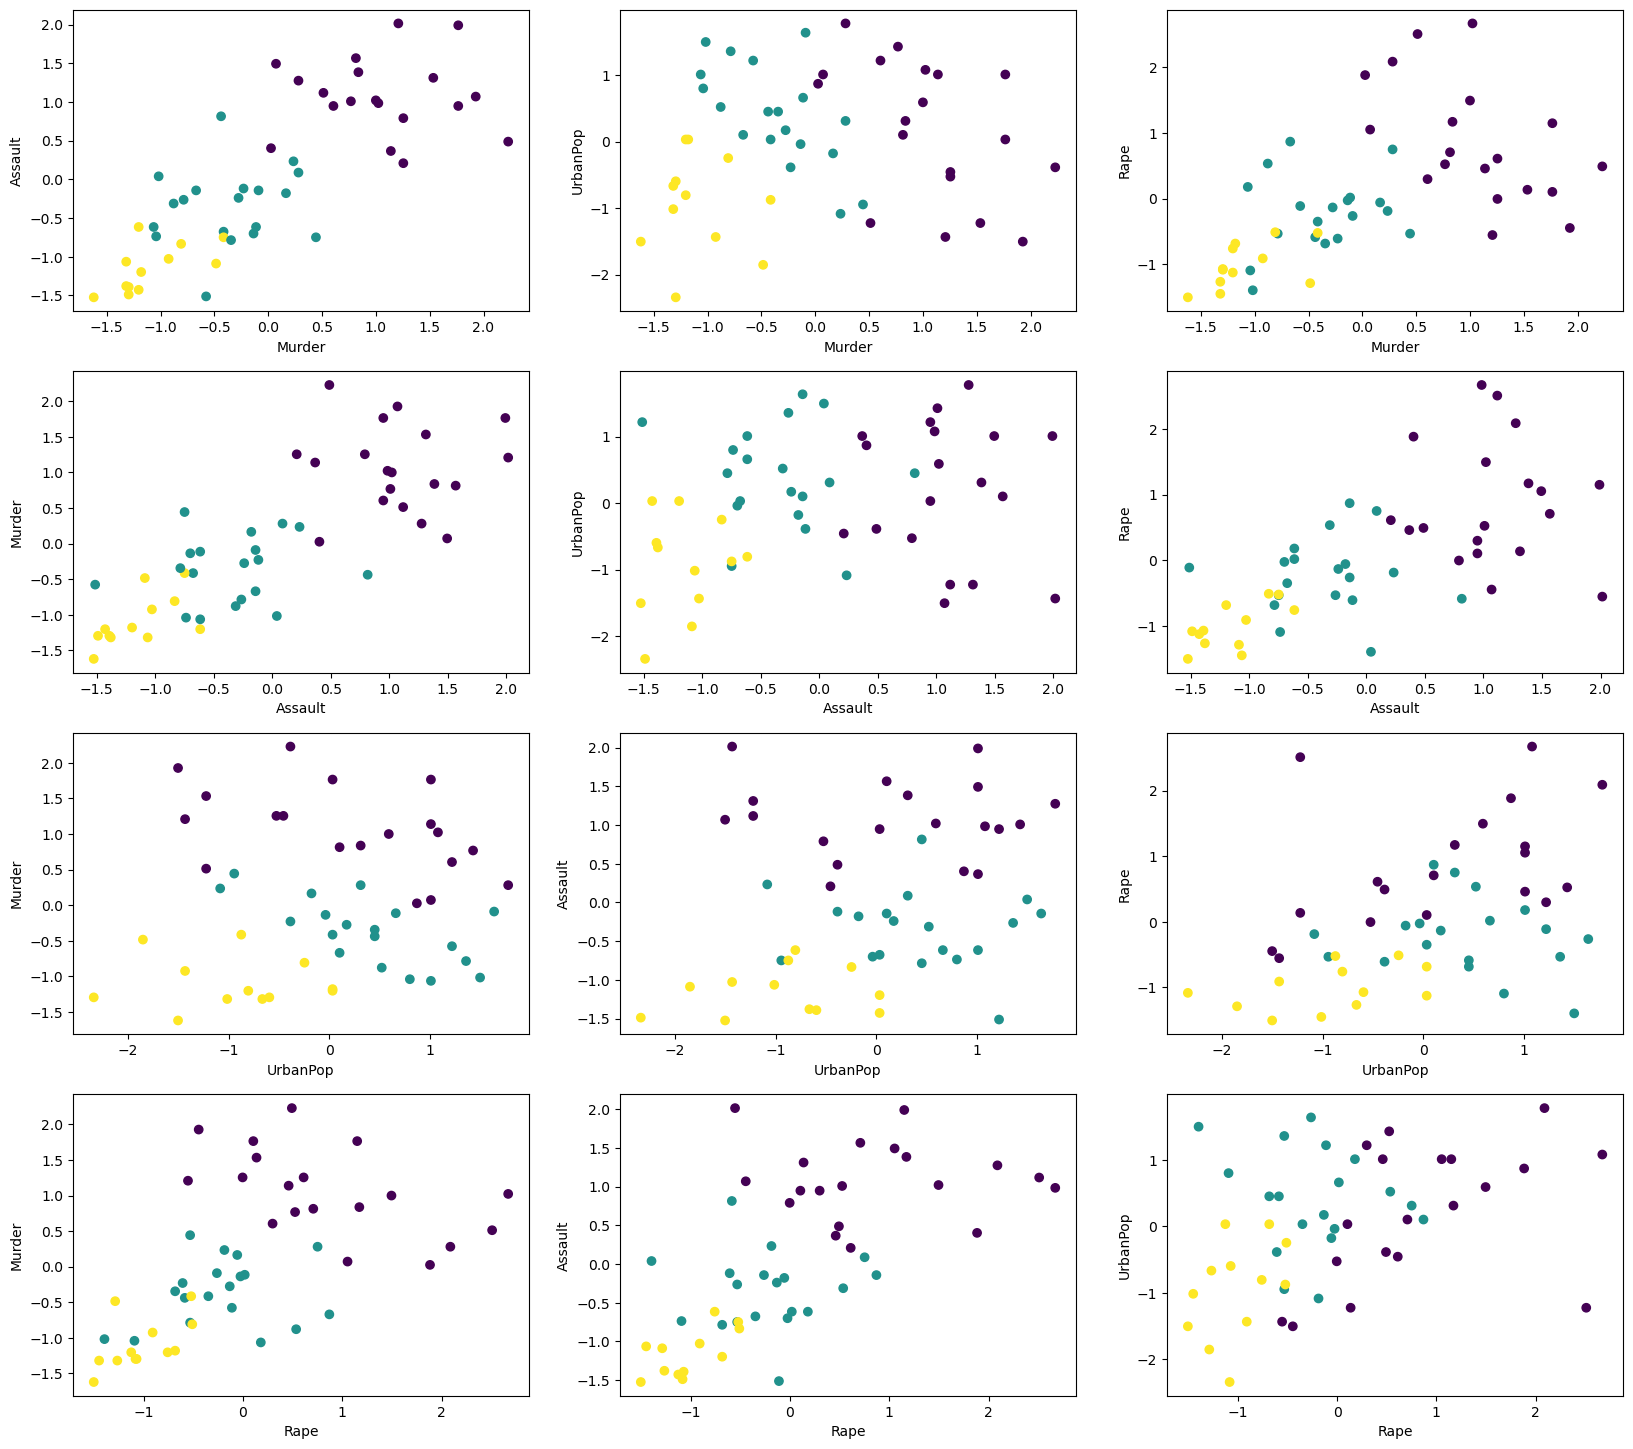

In [236]:
plt.figure(figsize=(20, 18))
plot_num = 1

for i in X.columns:
    for k in X.columns:
        if i != k:
            plt.subplot(4,3, plot_num)
            plt.scatter(i, k, c=clusters ,data=X)
            plt.xlabel(i)
            plt.ylabel(k)
            plot_num += 1

In [237]:
# Grafiklere bakınca "murder-assault" veya "murder-rape" ikilisi clustering için en verimli feature'lar gibi..

In [240]:
X["cluster"] = clusters
X.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,0
2,0.072361,1.493817,1.009122,1.053466,0
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,0


In [243]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

# Burada actual değerleri bilmdeğimiz için yaptığımız predictionlar üzerinden groupby yaptık.

cluster,0,1,2
Murder,1.053771,-0.365856,-1.089198
Assault,1.073403,-0.347968,-1.148605
UrbanPop,0.193714,0.399403,-0.939102
Rape,0.861041,-0.220851,-1.013634


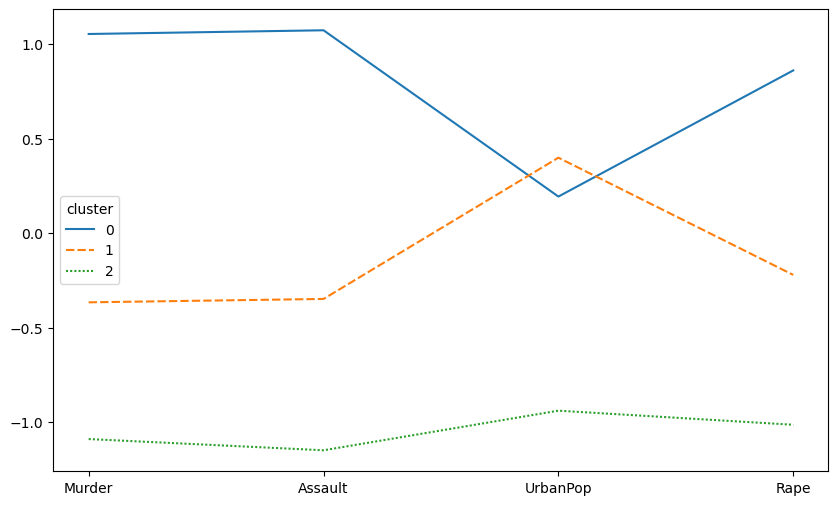

In [245]:
sns.lineplot(data=clus_pred);

In [247]:
# Evet bu grafiği yorumlarsak "murder" ve "asssault" ile yolumuza devam edebiliriz.
# Bir de boxplot'lara bakalım.

In [252]:
X.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'cluster'], dtype='object')

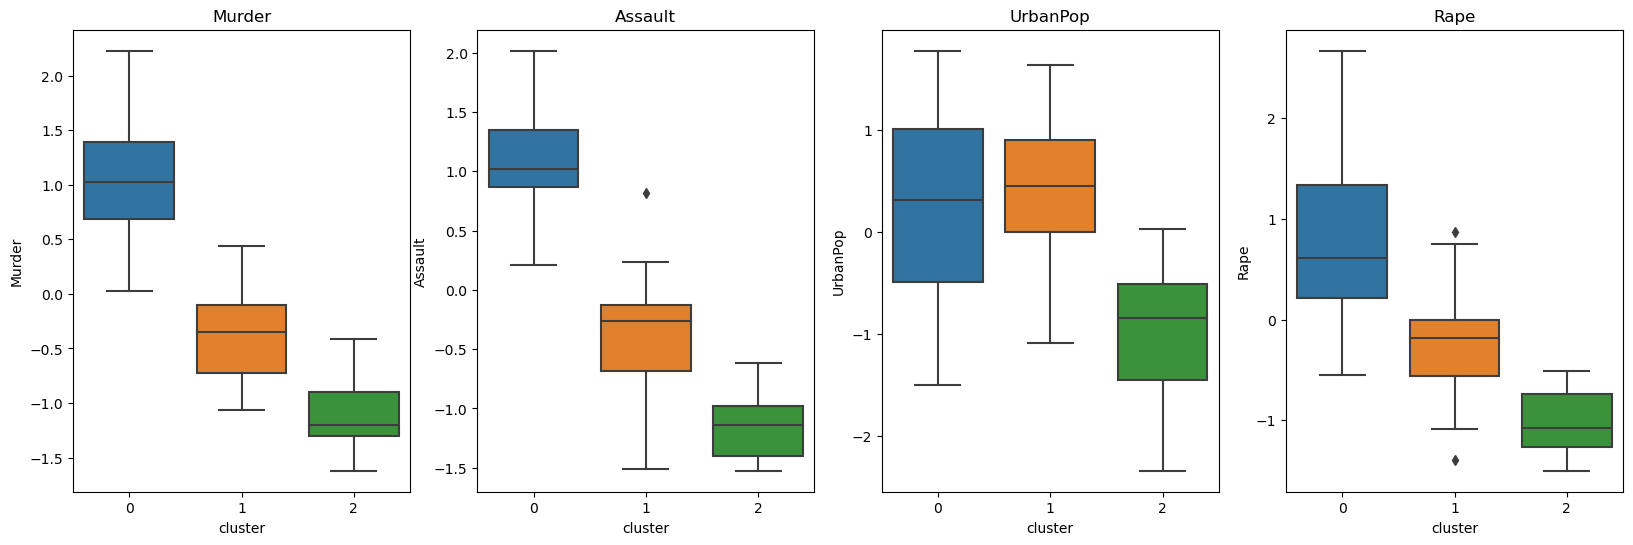

In [256]:
plt.figure(figsize=(20, 6))
plot_num = 1
for col in X.columns:
    if col != "cluster":
        plt.subplot(1,4,plot_num)
        sns.boxplot(y = col, x = "cluster", data=X)
        plt.title(col)
        plot_num += 1

In [ ]:
# Boxplot'lara bakarak da en uygun 2 feature'un "Murder" ve "assault" olduğunu görüyoruz.

In [260]:
X["cluster"].value_counts()

# Tüm feauture'lar ile yaptığımız clustering sonrası cluster'lara ait gözlem sayılar bunlar.
# Bunlar 2 feature ile yaptıklarımızla kıyaslayacaz.

# Ayrıca burada boxplotlara bakınca cluster numaralarını cluster isimleri ile eşleştirebiliyoruz:
    # Tamamnında 2 numaralı cluster sayı aralığı en düşük demek ki 2 : "Low Crime"
    # Tamamında 1 numaralı cluster sayı aralığı ortanca demek ki 1 : "Medium Crime"
    # Tamamında 3 numaralı cluster sayı aralığı en yüksek demek ki 3: "High Crime"

0    19
1    19
2    12
Name: cluster, dtype: int64

In [261]:
X2 = X[["Murder", "Assault"]]
X2.head()

,Murder,Assault
0,1.255179,0.790787
1,0.513019,1.118060
2,0.072361,1.493817
3,0.234708,0.233212
4,0.281093,1.275635


## Hopkins test

In [270]:
hopkins(X2, X2.shape[0])
# 0- 0.5 aralığı clustering için  datamızın random dağılımının elverişli olduğunu gösterir.
# yukarıda tüm feature'lar ile aldığımız score  = 0.37868586648192193 , Az da olsa iyileşme var.

0.299320943182866

In [266]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

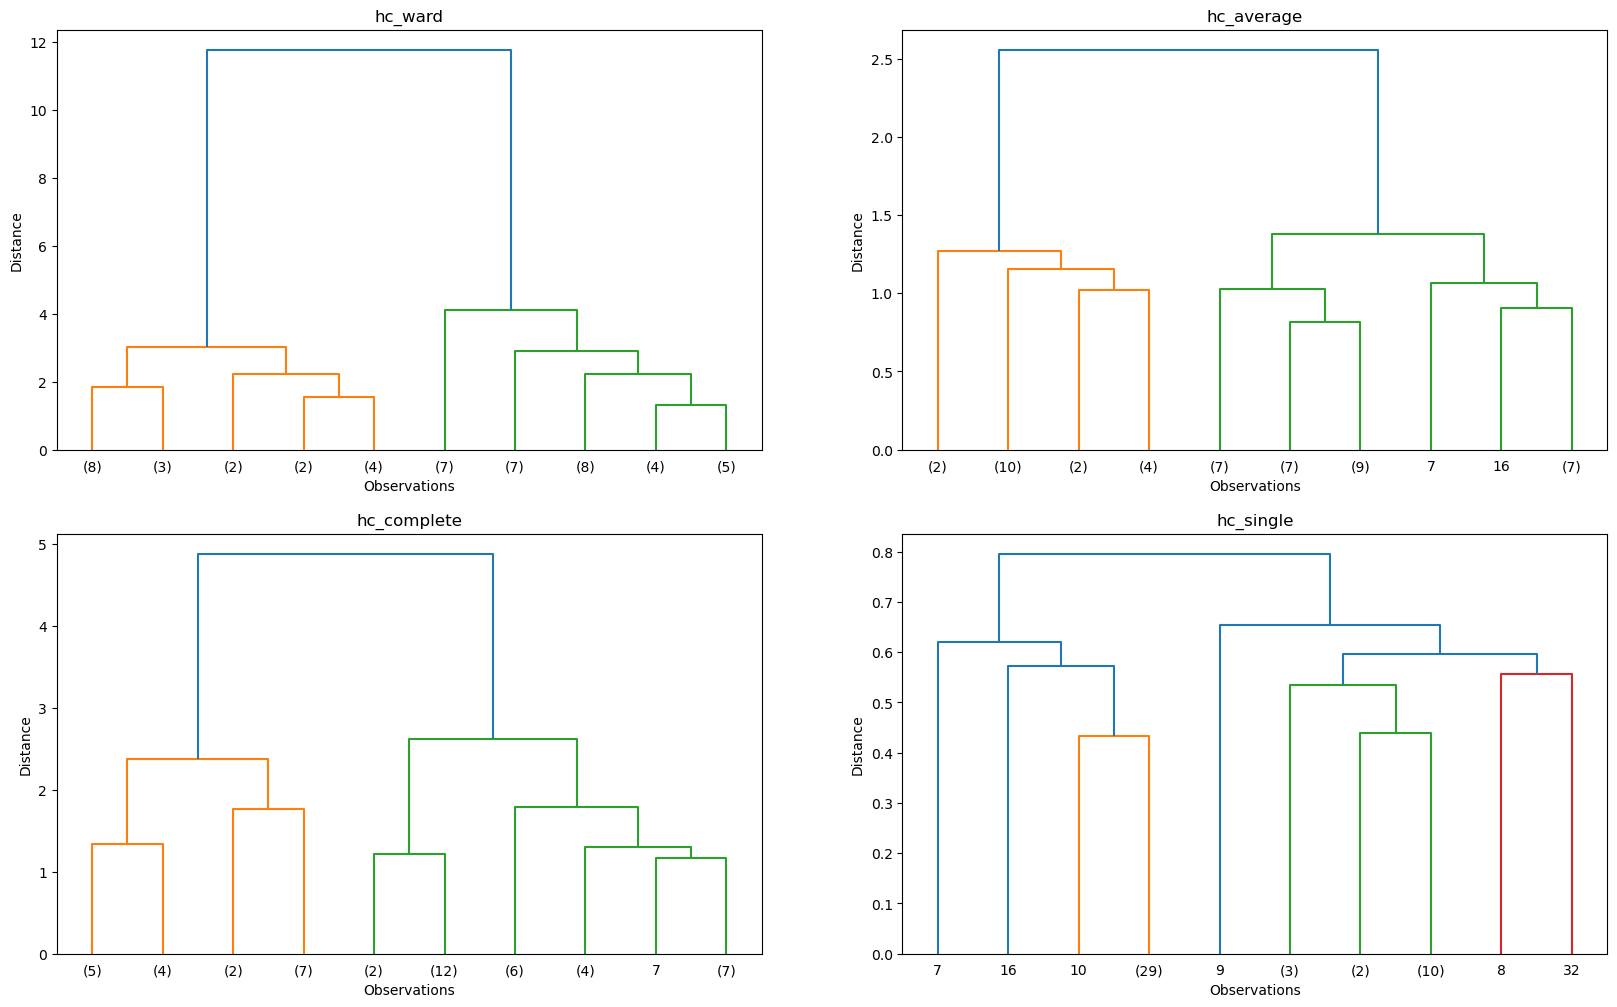

In [272]:
plt.figure(figsize = (20,12))
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode="lastp", p=10)
    k +=1
    
# Burada yine en uygun distance metric "ward" çıktı. Genelde de ward seçilir zaten.

In [274]:
K = range(2,11)
K = range(2, 10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f"k : {k}, silhoutte score : {silhouette_score(df, model.labels_)}")

k : 2, silhoutte score : 0.5745378792183005
k : 3, silhoutte score : 0.4216324799272443
k : 4, silhoutte score : 0.25545590085513525
k : 5, silhoutte score : 0.19680650445507408
k : 6, silhoutte score : 0.0968327084126196
k : 7, silhoutte score : 0.10030289787924711
k : 8, silhoutte score : 0.041582958225373556
k : 9, silhoutte score : 0.02320508854920391


In [275]:
final_model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

In [276]:
X2["cluster"].value_counts()

1    24
0    19
2     7
Name: cluster, dtype: int64

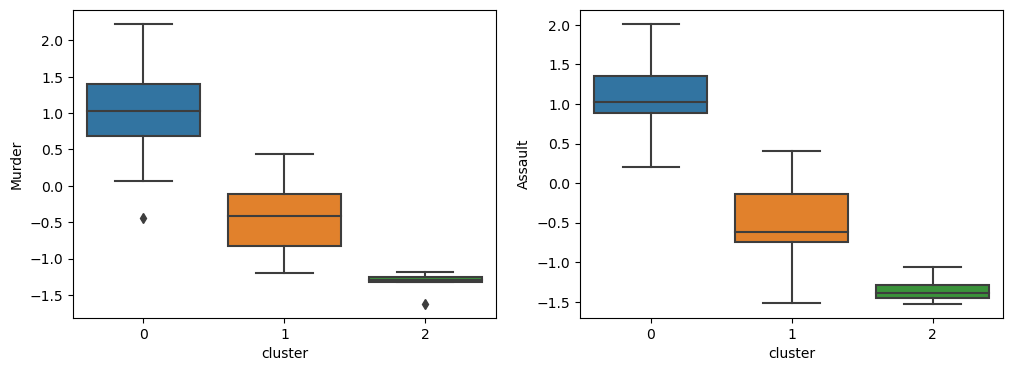

In [285]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(y ="Murder", x = "cluster", data=X2)
plt.subplot(1, 2, 2)
sns.boxplot(y = "Assault", x = "cluster", data=X2);

In [ ]:
# Buradan tekrar 1 : medium, 0 : high, 2: low olduğunu tespit ettik.

**Evaluation**

- 0 : states with high crime rates
- 2 : states with low crime rates
- 1 : states with medium crime rates

In [286]:
X2["crime_level"] = X2["cluster"].map({0 : "high", 1 : "low", 2 : "medium"})

In [287]:
X2.head()

,Murder,Assault,cluster,crime_level
0,1.255179,0.790787,0,high
1,0.513019,1.118060,0,high
2,0.072361,1.493817,0,high
3,0.234708,0.233212,1,low
4,0.281093,1.275635,0,high


In [288]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [292]:
X2["states"] = df.index
X2

,Murder,Assault,cluster,crime_level,states
0,1.255179,0.790787,0,high,Alabama
1,0.513019,1.118060,0,high,Alaska
2,0.072361,1.493817,0,high,Arizona
3,0.234708,0.233212,1,low,Arkansas
4,0.281093,1.275635,0,high,California
5,0.025976,0.402909,1,low,Colorado
6,-1.040880,-0.736484,1,low,Connecticut
7,-0.437875,0.815030,0,high,Delaware
8,1.765415,1.990786,0,high,Florida
9,2.229265,0.487757,0,high,Georgia
